In [1]:
import sys
sys.path.append(r"d:\gis\toolboxes\pysda")

In [2]:
# import pysda modules
import sdapoly, sdaprop, sdainterp

In [3]:
# get/set an aoi
myshp = r"F:\ZBOOK\GIS\TEMP\fs.shp"
myaoi = sdapoly.shp(myshp)

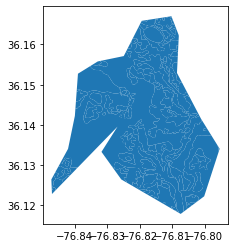

In [4]:
# tell matplot lib to publish here
%matplotlib inline

# visualize
myaoi.plot()

In [5]:
# now to get SSURGO property, sandtotal_r
wtdavg=sdaprop.getprop(df=myaoi,column='mukey',method='wtd_avg',top=0,bottom=100,prop='sandtotal_r',minmax=None,prnt=False,meta=False)

In [6]:
# remove duplicate columns
myaoi_cols = myaoi.columns.tolist()
wtdavg_cols = wtdavg.columns.tolist()
drop_cols = [col for col in wtdavg_cols if col in myaoi_cols and col != 'mukey']
wtdavg.drop(columns = drop_cols, inplace = True)

# join/merge the results, show first record
mymerge = myaoi.merge(wtdavg, how = 'inner', on = 'mukey')
mymerge.head(1)

,areasymbol,areaname,muname,musym,mukey,nat_musym,geometry,sandtotal_r
0,NC015,"Bertie County, North Carolina",Lynchburg sandy loam,Ly,111444,3qyz,"POLYGON ((-76.81374 36.12652, -76.81422 36.12653, -76.81445 36.12663, -76.81450 36.12666, -76.81483 36.12667, -76.81492 36.12671, -76.81497 36.12678, -76.81499 36.12683, -76.81498 36.12692, -76.81494 36.12699, -76.81460 36.12738, -76.81454 36.12750, -76.81450 36.12772, -76.81439 36.12782, -76.81417 36.12781, -76.81401 36.12779, -76.81388 36.12773, -76.81374 36.12764, -76.81365 36.12752, -76.81350 36.12724, -76.81345 36.12685, -76.81341 36.12679, -76.81336 36.12675, -76.81323 36.12669, -76.81334 36.12663, -76.81349 36.12658, -76.81374 36.12652))",60.00


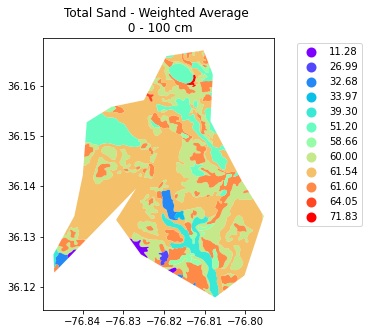

In [7]:
# visualize
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
fig.set_size_inches(5,5)
mymerge.plot(column = 'sandtotal_r', ax=ax, cmap = 'rainbow',
            legend = True)

# add a legend
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.4,1.0))
ax.set(title = 'Total Sand - Weighted Average \n 0 - 100 cm')

plt.show()

In [6]:
import folium
env = myAOI.envelope
cent = env.centroid
x = cent.x[0]
y = cent.y[0]
m = folium.Map([y, x], zoom_start = 13, tiles = 'Stamen Terrain')
 
folium.Choropleth(geo_data = mySoils).add_to(m)
m


C:\Program Files\ArcGIS\Pro\bin\Python\envs\pro27_clone\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until
